In [1]:
# from google.colab import drive
# drive.mount('/content/MyDrive')

In [2]:
# %cd /content/MyDrive/My Drive/Colab Notebooks/Machine_Learning_FinalProject

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
import pickle as cPickle
import tensorflow as tf

# tf.test.gpu_device_name()

''

In [4]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

In [5]:
categories = unpickle('batches.meta')

In [6]:
categories=categories['label_names']


In [7]:
categories

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [8]:
train_batch1=unpickle('data_batch_1')
train_batch2=unpickle('data_batch_2')
train_batch3=unpickle('data_batch_3')
train_batch4=unpickle('data_batch_4')
train_batch5=unpickle('data_batch_5')

In [9]:
train_b1=train_batch1['data']
train_b2=train_batch2['data']
train_b3=train_batch3['data']
train_b4=train_batch4['data']
train_b5=train_batch5['data']

# getting the labels of each batches 
batch1_labels=train_batch1['labels']
batch2_labels=train_batch2['labels']
batch3_labels=train_batch3['labels']
batch4_labels=train_batch4['labels']
batch5_labels=train_batch5['labels']

In [10]:
def reshaping(data):
    data=data.reshape(10000,3,32,32).transpose(0,2,3,1).astype("float")
    return data

In [11]:
# reshaping the batches
x_train1=reshaping(train_b1)
x_train2=reshaping(train_b2)
x_train3=reshaping(train_b3)
x_train4=reshaping(train_b4)
x_train5=reshaping(train_b5)

In [12]:
# checking the shape of each batch
print('Training batch1 shape:',x_train1.shape)
print('Training batch2 shape:',x_train2.shape)
print('Training batch3 shape:',x_train3.shape)
print('Training batch4 shape:',x_train4.shape)
print('Training batch5 shape:',x_train5.shape)


Training batch1 shape: (10000, 32, 32, 3)
Training batch2 shape: (10000, 32, 32, 3)
Training batch3 shape: (10000, 32, 32, 3)
Training batch4 shape: (10000, 32, 32, 3)
Training batch5 shape: (10000, 32, 32, 3)


In [13]:
# combining all these five batches of data and labels
X_train=np.concatenate((x_train1,x_train2,x_train3,x_train4,x_train5),axis=0)
y_train=np.concatenate((batch1_labels,batch2_labels,batch3_labels,batch4_labels,batch5_labels),axis=0)
# shapes of train set data and labels
print("shape of the Xtrain set :",X_train.shape)
print("Shape of the Ytrain set lables ",y_train.shape)

shape of the Xtrain set : (50000, 32, 32, 3)
Shape of the Ytrain set lables  (50000,)


In [14]:
# test set unpickle 
test_batch=unpickle('test_batch')
X_test_batch=test_batch["data"]
y_test=test_batch['labels']
X_test=reshaping(X_test_batch)
# shapes of test set data and labels
print("shape of the Xtest set :",X_test.shape)
print("Shape of the Ytest set lables ",np.shape(y_test))

shape of the Xtest set : (10000, 32, 32, 3)
Shape of the Ytest set lables  (10000,)


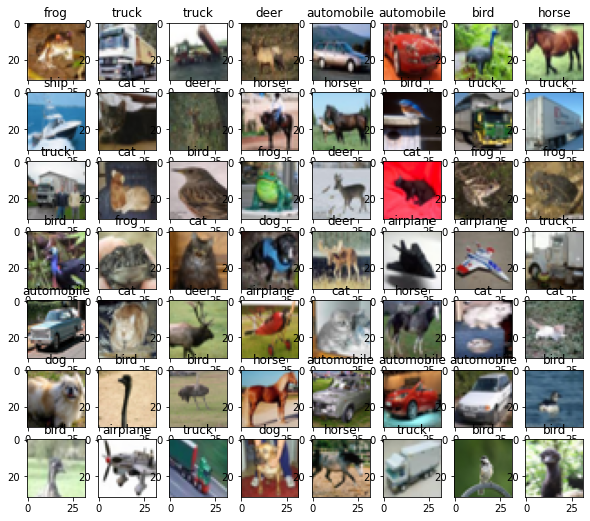

In [15]:

fig = plt.figure(figsize=(10,10))
for i in range(56):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(X_train[i].astype('uint8'), cmap = plt.cm.bone)
    plt.title(categories[y_train[i]])

plt.show()

In [16]:
X_train = np.reshape(X_train, (X_train.shape[0], -1)) # The -1 means that the corresponding dimension is calculated from the other given dimensions.

X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape) 
print(X_train[0])

(50000, 3072)
[ 59.  62.  63. ... 123.  92.  72.]


In [17]:
#Normalizing by dividing t to 255
X_train=((X_train/255)*2)-1 
print(X_train.shape)
print(X_train[0])

(50000, 3072)
[-0.5372549  -0.51372549 -0.50588235 ... -0.03529412 -0.27843137
 -0.43529412]


In [41]:

from sklearn import svm

def svm_linear(c):
    svc = svm.SVC(probability = False, kernel = 'linear', C = c)
    
    svc.fit(X_train, y_train) 
    
    # Find the prediction and accuracy on the training set.
    Yhat_svc_linear_train = svc.predict(X_train)
    acc_train = np.mean(Yhat_svc_linear_train == y_train)
    acc_train_svm_linear.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    # Find the prediction and accuracy on the test set.
    Yhat_svc_linear_test = svc.predict(X_test)
    acc_test = np.mean(Yhat_svc_linear_test == y_test)
    acc_test_svm_linear.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))

In [ ]:
%%time
c_svm_linear = [0.0001,0.001,0.01,0.1,1,10,100]
acc_train_svm_linear = []
acc_test_svm_linear = []

for c in c_svm_linear:
    svm_linear(c)

plt.plot(c_svm_linear, acc_train_svm_linear,'.-',color='red')
plt.plot(c_svm_linear, acc_test_svm_linear,'.-',color='orange')
plt.xlabel('c')
plt.ylabel('Accuracy')
plt.title("Plot of accuracy vs c for training and test data")
plt.grid()

Train Accuracy = 0.406180
Test Accuracy = 0.216000
